In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Calculate the variance of earing event

In [7]:
# Load the data which has the variance of earning from 5 days before to earning day
earnings_dates_for_tickers = pd.read_csv('Results_0510.csv')

In [8]:
earnings_dates_for_tickers

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,index,Short_ticker,Name,Ticker,Date,Event Type,Adjusted Trading Date,...,straddle_iv_2d_T2,straddle_iv_3d_T2,straddle_iv_4d_T2,straddle_iv_5d_T2,time_T2,time_1d_T2,time_2d_T2,time_3d_T2,time_4d_T2,time_5d_T2
0,0,0,0,396,A,Agilent Technologies Inc,A US,2018-02-14 16:05:00,ER,2018-02-15 00:00:00+00:00,...,0.293241,0.319887,0.334109,0.275807,0.082192,0.084932,0.087671,0.09589,0.09863,0.10137
1,1,1,1,1298,A,Agilent Technologies Inc,A US,2018-05-14 16:05:00,ER,2018-05-15 00:00:00+00:00,...,0.269085,0.278077,0.269953,NaN,0.087671,0.095890,0.098630,0.10137,0.10411,NaN
2,2,2,2,2023,A,Agilent Technologies Inc,A US,2018-08-14 16:05:00,ER,2018-08-15 00:00:00+00:00,...,NaN,NaN,NaN,NaN,0.104110,NaN,NaN,NaN,NaN,NaN
3,3,3,3,2754,A,Agilent Technologies Inc,A US,2018-11-19 16:05:00,ER,2018-11-20 00:00:00+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,4,3297,A,Agilent Technologies Inc,A US,2019-02-20 16:05:00,ER,2019-02-21 00:00:00+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19471,19471,19471,19471,15969,ZTS,Zoetis Inc,ZTS US,2023-02-14 07:00:00,ER,2023-02-13 00:00:00+00:00,...,0.297393,0.296896,0.286477,NaN,0.087671,0.095890,0.098630,0.10137,0.10411,NaN
19472,19472,19472,19472,16912,ZTS,Zoetis Inc,ZTS US,2023-05-04 07:00:00,ER,2023-05-03 00:00:00+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19473,19473,19473,19473,17936,ZTS,Zoetis Inc,ZTS US,2023-08-08 07:00:00,ER,2023-08-07 00:00:00+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19474,19474,19474,19474,18652,ZTS,Zoetis Inc,ZTS US,2023-11-02 07:00:00,ER,2023-11-01 00:00:00+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# drop the first four columns
earnings_dates_for_tickers = earnings_dates_for_tickers.drop(earnings_dates_for_tickers.columns[[0, 1, 2, 3]], axis=1)

In [14]:
# calculate the variance of earning from 5 days before to earning day
forward_vol_0d = np.sqrt((earnings_dates_for_tickers['time_T2']*earnings_dates_for_tickers['straddle_iv_T2']**2.0-earnings_dates_for_tickers['time_T1']*earnings_dates_for_tickers['straddle_iv_T1']**2.0)/(earnings_dates_for_tickers['time_T2']-earnings_dates_for_tickers['time_T1']))
event_var_0d = earnings_dates_for_tickers['time_T1']*(earnings_dates_for_tickers['straddle_iv_T1']**2.0-forward_vol_0d**2.0)

forward_vol_5d = np.sqrt((earnings_dates_for_tickers['time_5d_T2']*earnings_dates_for_tickers['straddle_iv_5d_T2']**2.0-earnings_dates_for_tickers['time_5d_T1']*earnings_dates_for_tickers['straddle_iv_5d_T1']**2.0)/(earnings_dates_for_tickers['time_5d_T2']-earnings_dates_for_tickers['time_5d_T1']))
event_var_5d = earnings_dates_for_tickers['time_5d_T1']*(earnings_dates_for_tickers['straddle_iv_5d_T1']**2.0-forward_vol_5d**2.0)
forward_vol_4d = np.sqrt((earnings_dates_for_tickers['time_4d_T2']*earnings_dates_for_tickers['straddle_iv_4d_T2']**2.0-earnings_dates_for_tickers['time_4d_T1']*earnings_dates_for_tickers['straddle_iv_4d_T1']**2.0)/(earnings_dates_for_tickers['time_4d_T2']-earnings_dates_for_tickers['time_4d_T1']))
event_var_4d = earnings_dates_for_tickers['time_4d_T1']*(earnings_dates_for_tickers['straddle_iv_4d_T1']**2.0-forward_vol_4d**2.0)
forward_vol_3d = np.sqrt((earnings_dates_for_tickers['time_3d_T2']*earnings_dates_for_tickers['straddle_iv_3d_T2']**2.0-earnings_dates_for_tickers['time_3d_T1']*earnings_dates_for_tickers['straddle_iv_3d_T1']**2.0)/(earnings_dates_for_tickers['time_3d_T2']-earnings_dates_for_tickers['time_3d_T1']))
event_var_3d = earnings_dates_for_tickers['time_3d_T1']*(earnings_dates_for_tickers['straddle_iv_3d_T1']**2.0-forward_vol_3d**2.0)
forward_vol_2d = np.sqrt((earnings_dates_for_tickers['time_2d_T2']*earnings_dates_for_tickers['straddle_iv_2d_T2']**2.0-earnings_dates_for_tickers['time_2d_T1']*earnings_dates_for_tickers['straddle_iv_2d_T1']**2.0)/(earnings_dates_for_tickers['time_2d_T2']-earnings_dates_for_tickers['time_2d_T1']))
event_var_2d = earnings_dates_for_tickers['time_2d_T1']*(earnings_dates_for_tickers['straddle_iv_2d_T1']**2.0-forward_vol_2d**2.0)
forward_vol_1d = np.sqrt((earnings_dates_for_tickers['time_1d_T2']*earnings_dates_for_tickers['straddle_iv_1d_T2']**2.0-earnings_dates_for_tickers['time_1d_T1']*earnings_dates_for_tickers['straddle_iv_1d_T1']**2.0)/(earnings_dates_for_tickers['time_1d_T2']-earnings_dates_for_tickers['time_1d_T1']))
event_var_1d = earnings_dates_for_tickers['time_1d_T1']*(earnings_dates_for_tickers['straddle_iv_1d_T1']**2.0-forward_vol_4d**2.0)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


# 2. Calculate the ratio of variance of event on earning day / variance of event {i} day before
  - The bigger the ratio, the bigger increase of variance on earnind day, the more profitable to sell straddle
  

In [18]:
# store the variance of earnning to the dataframe
earnings_dates_for_tickers['event_var_0d/5d'] = np.sqrt(event_var_0d)/np.sqrt(event_var_5d)
earnings_dates_for_tickers['event_var_0d/4d'] = np.sqrt(event_var_0d)/np.sqrt(event_var_4d)
earnings_dates_for_tickers['event_var_0d/3d'] = np.sqrt(event_var_0d)/np.sqrt(event_var_3d)
earnings_dates_for_tickers['event_var_0d/2d'] = np.sqrt(event_var_0d)/np.sqrt(event_var_2d)
earnings_dates_for_tickers['event_var_0d/1d'] = np.sqrt(event_var_0d)/np.sqrt(event_var_1d)


# group the data by deciles of the ratio
num_quantiles = 10

earnings_dates_for_tickers['event_var_0d/5d_decile'] = pd.qcut(earnings_dates_for_tickers['event_var_0d/5d'], num_quantiles)
earnings_dates_for_tickers['event_var_0d/4d_decile'] = pd.qcut(earnings_dates_for_tickers['event_var_0d/4d'], num_quantiles)
earnings_dates_for_tickers['event_var_0d/3d_decile'] = pd.qcut(earnings_dates_for_tickers['event_var_0d/3d'], num_quantiles)
earnings_dates_for_tickers['event_var_0d/2d_decile'] = pd.qcut(earnings_dates_for_tickers['event_var_0d/2d'], num_quantiles)
earnings_dates_for_tickers['event_var_0d/1d_decile'] = pd.qcut(earnings_dates_for_tickers['event_var_0d/1d'], num_quantiles)



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [32]:
# Calculate the mean 'straddle_pnl' for each decile
mean_pnl_0d_5d_decile = earnings_dates_for_tickers.groupby('event_var_0d/5d_decile')['straddle_pnl'].mean()
mean_pnl_0d_4d_decile = earnings_dates_for_tickers.groupby('event_var_0d/4d_decile')['straddle_pnl'].mean()
mean_pnl_0d_3d_decile = earnings_dates_for_tickers.groupby('event_var_0d/3d_decile')['straddle_pnl'].mean()
mean_pnl_0d_2d_decile = earnings_dates_for_tickers.groupby('event_var_0d/2d_decile')['straddle_pnl'].mean()
mean_pnl_0d_1d_decile = earnings_dates_for_tickers.groupby('event_var_0d/1d_decile')['straddle_pnl'].mean()



/var/folders/8n/rsfbfk1556gb1rdqn5z765400000gn/T/ipykernel_25058/2536715382.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_pnl_0d_5d_decile = earnings_dates_for_tickers.groupby('event_var_0d/5d_decile')['straddle_pnl'].mean()
/var/folders/8n/rsfbfk1556gb1rdqn5z765400000gn/T/ipykernel_25058/2536715382.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_pnl_0d_4d_decile = earnings_dates_for_tickers.groupby('event_var_0d/4d_decile')['straddle_pnl'].mean()
/var/folders/8n/rsfbfk1556gb1rdqn5z765400000gn/T/ipykernel_25058/2536715382.py:4: FutureWarning: The default of observed=False is deprecated and

# Mean PnL of the ratio grouped by its deciles
- both tales and bar plots are shown

In [33]:
# print the mean tables one by one
print(mean_pnl_0d_5d_decile)


event_var_0d/5d_decile
(0.196, 0.73]      40.607850
(0.73, 0.839]      21.090807
(0.839, 0.914]    -46.166353
(0.914, 0.967]    -81.664113
(0.967, 1.015]    -20.107372
(1.015, 1.067]    -16.258767
(1.067, 1.131]      5.224265
(1.131, 1.209]     46.961187
(1.209, 1.371]     63.630680
(1.371, 18.175]    46.171802
Name: straddle_pnl, dtype: float64


In [25]:
print(mean_pnl_0d_4d_decile)

event_var_0d/4d_decile
(0.169, 0.83]       36.061578
(0.83, 0.909]        7.982901
(0.909, 0.956]     -58.803245
(0.956, 0.999]     -15.140561
(0.999, 1.041]     -15.287619
(1.041, 1.086]     -11.498956
(1.086, 1.14]       21.279671
(1.14, 1.215]       71.353702
(1.215, 1.349]      25.559362
(1.349, 38.983]    105.822440
Name: straddle_pnl, dtype: float64


In [26]:
print(mean_pnl_0d_3d_decile)

event_var_0d/3d_decile
(0.199, 0.833]     48.031359
(0.833, 0.909]    -40.781565
(0.909, 0.955]    -13.863243
(0.955, 0.995]    -26.278133
(0.995, 1.033]      5.255188
(1.033, 1.078]      4.405566
(1.078, 1.128]    -62.598348
(1.128, 1.196]     65.689388
(1.196, 1.326]     61.782519
(1.326, 88.446]    90.356869
Name: straddle_pnl, dtype: float64


In [27]:
print(mean_pnl_0d_2d_decile)

event_var_0d/2d_decile
(0.189, 0.85]     42.680278
(0.85, 0.907]    -42.109201
(0.907, 0.947]    33.501075
(0.947, 0.981]    -7.182138
(0.981, 1.014]   -17.828371
(1.014, 1.047]    11.598669
(1.047, 1.089]   -15.992728
(1.089, 1.152]    27.404324
(1.152, 1.264]    22.909801
(1.264, 12.57]    70.681773
Name: straddle_pnl, dtype: float64


In [28]:
print(mean_pnl_0d_1d_decile)

event_var_0d/1d_decile
(0.112, 0.855]    33.075320
(0.855, 0.911]   -20.461421
(0.911, 0.945]   -14.216172
(0.945, 0.977]   -16.588746
(0.977, 1.005]     0.245918
(1.005, 1.036]    10.329331
(1.036, 1.071]    20.094010
(1.071, 1.117]    40.685125
(1.117, 1.205]    74.205822
(1.205, 6.31]     35.717848
Name: straddle_pnl, dtype: float64


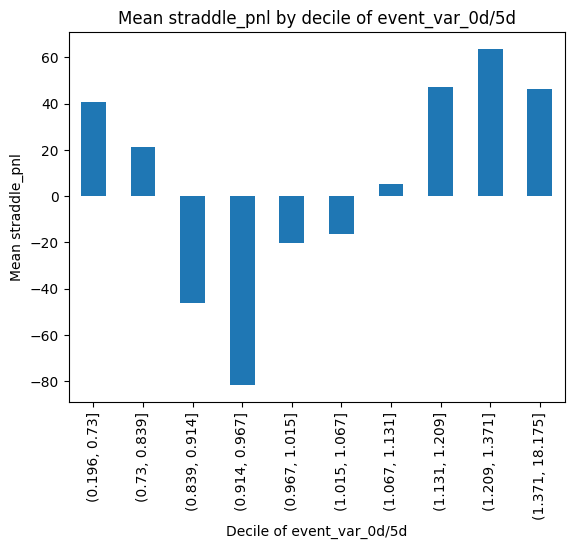

In [40]:
# bar plot of the mean 'straddle_pnl' for each decile, for those five dataframes
mean_pnl_0d_5d_decile.plot(kind='bar')
plt.xlabel('Decile of event_var_0d/5d')
plt.ylabel('Mean straddle_pnl')
plt.title('Mean straddle_pnl by decile of event_var_0d/5d')
plt.show()

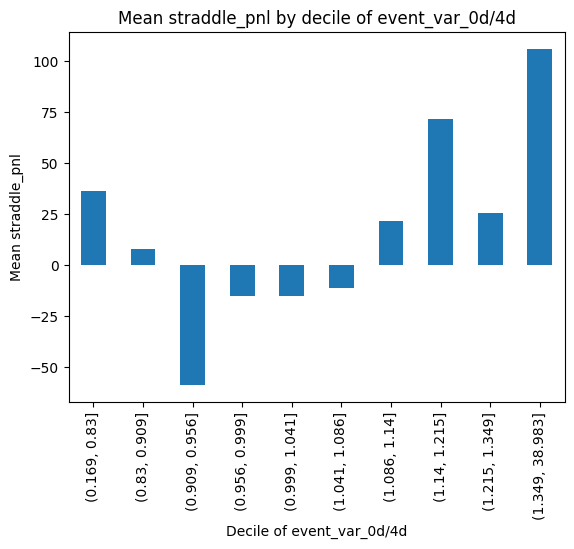

In [41]:
mean_pnl_0d_4d_decile.plot(kind='bar')
plt.xlabel('Decile of event_var_0d/4d')
plt.ylabel('Mean straddle_pnl')
plt.title('Mean straddle_pnl by decile of event_var_0d/4d')
plt.show()

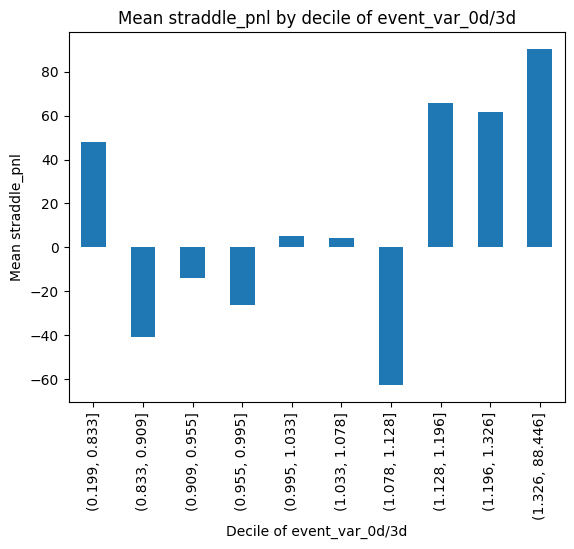

In [42]:
mean_pnl_0d_3d_decile.plot(kind='bar')
plt.xlabel('Decile of event_var_0d/3d')
plt.ylabel('Mean straddle_pnl')
plt.title('Mean straddle_pnl by decile of event_var_0d/3d')
plt.show()

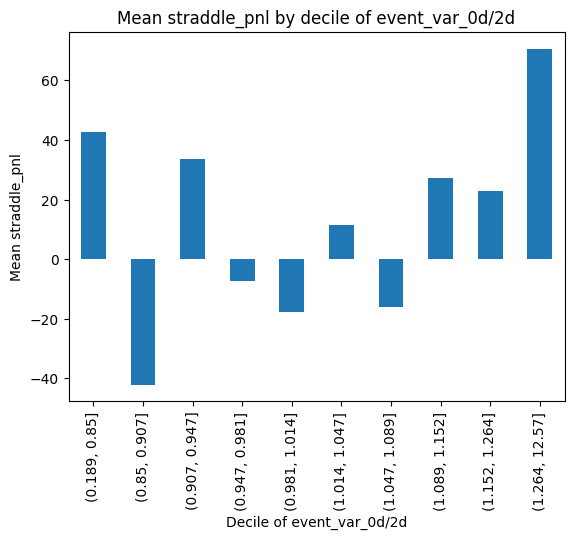

In [43]:
mean_pnl_0d_2d_decile.plot(kind='bar')
plt.xlabel('Decile of event_var_0d/2d')
plt.ylabel('Mean straddle_pnl')
plt.title('Mean straddle_pnl by decile of event_var_0d/2d')
plt.show()

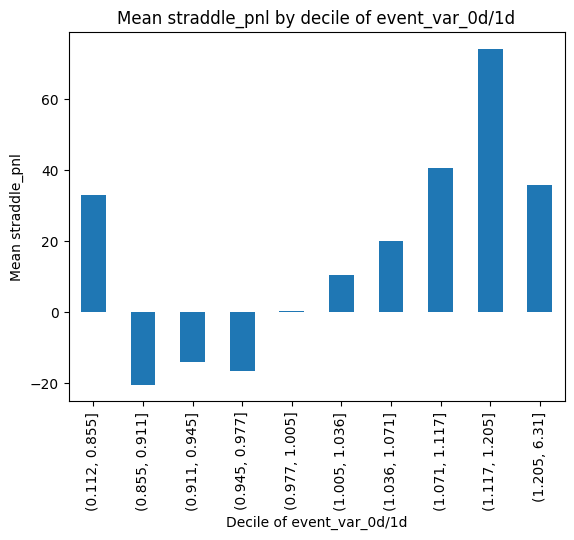

In [44]:
mean_pnl_0d_1d_decile.plot(kind='bar')
plt.xlabel('Decile of event_var_0d/1d')
plt.ylabel('Mean straddle_pnl')
plt.title('Mean straddle_pnl by decile of event_var_0d/1d')
plt.show()